In [1]:
import re
import pandas as pd 
import string
from string import punctuation
from collections import Counter
import statistics

import spacy
import pt_core_news_sm
nlp = pt_core_news_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import nltk;
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\azvma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Importando o arquivo Excel com os dados

In [2]:
df = pd.read_excel('./data/EsaueJaco_Revisado.xlsx',
                 error_bad_lines=False,
                  usecols = ['ID', 'Personagem','Texto', 'Tipo', 'TamanhoFrase'])
df.shape

(4824, 5)

In [3]:
df.head()

,ID,Personagem,Texto,Tipo,TamanhoFrase
0,1,Narrador,Era a primeira vez que as duas iam ao Morro d...,Narração,56
1,2,Narrador,Começaram de subir pelo lado da Rua do Carmo.,Narração,46
2,3,Narrador,Muita gente há no Rio de Janeiro que nunca lá...,Narração,121
3,4,Narrador,Nem todos podem dizer que conhecem uma cidade...,Narração,55
4,5,Narrador,"Um velho inglês, que aliás andara terras e te...",Narração,182


### 1.1 Verificando a existência de nulos

In [4]:
df.isnull().sum()

ID              0
Personagem      0
Texto           0
Tipo            0
TamanhoFrase    0
dtype: int64

## 2. Observando frequências e criando uma nuvem de palavras

### 2.1 Frequências de Palavras

### As tags seguintes fazem uma análise de frequência de palavras para os três personagens centrais deste romance: Flora e os gêmeos Paulo e Pedro. 'Senhor', 'senhora'e 'Mamãe' devem ser consideradas as três maiores frequências na lista de Flora. A palavra 'perguntou' deriva de finais de frases onde o Narrador após alguma fala do tipo pergunta da personagem termina com essa afirmação.

In [5]:
StopWOrds = nltk.corpus.stopwords.words('portuguese')
StopWOrds.append('...')

In [6]:
print(StopWOrds)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

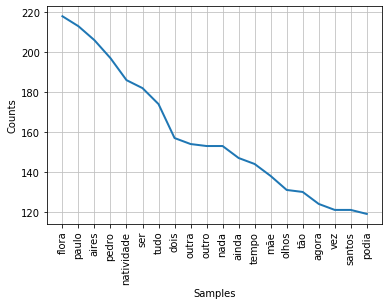

Total de palavras na obra, sem as stopwords:  38190


In [7]:
falas = df.Texto.tolist() 

falas = " ".join(s for s in falas )
sentencas = sent_tokenize(falas)
palavras = word_tokenize(falas.lower())
stopwords = set(StopWOrds + list(punctuation))
#stopwords = set(stopwords.words('portuguese') + list(punctuation))
palavras_sem_stopwords = [palavra for palavra in palavras if palavra not in stopwords]
freq = nltk.FreqDist(palavras_sem_stopwords)
freq.plot(20, cumulative=False)
print("Total de palavras na obra, sem as stopwords: ", len(palavras_sem_stopwords))

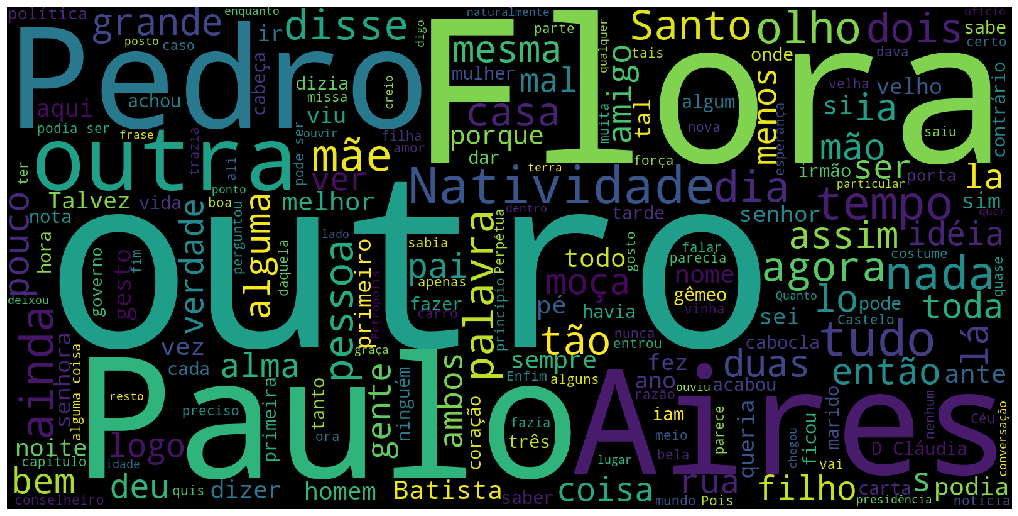

In [8]:
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=1600, height=800).generate(falas)
fig, ax = plt.subplots(figsize=(18,14))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off() 
plt.imshow(wordcloud);

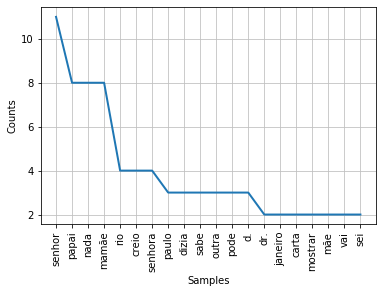

Total de palavras nas falas de Flora:  296


In [9]:
falaFlora = df[df.Personagem=='Flora'].Texto.tolist() 

falaFlora = " ".join(s for s in falaFlora )
sentencas = sent_tokenize(falaFlora)
palavras = word_tokenize(falaFlora.lower())
stopwords = set(StopWOrds + list(punctuation))
#stopwords = set(stopwords.words('portuguese') + list(punctuation))
palavras_flora = [palavra for palavra in palavras if palavra not in stopwords]
freq = nltk.FreqDist(palavras_flora)
freq.plot(20, cumulative=False)
print("Total de palavras nas falas de Flora: ", len(palavras_flora))

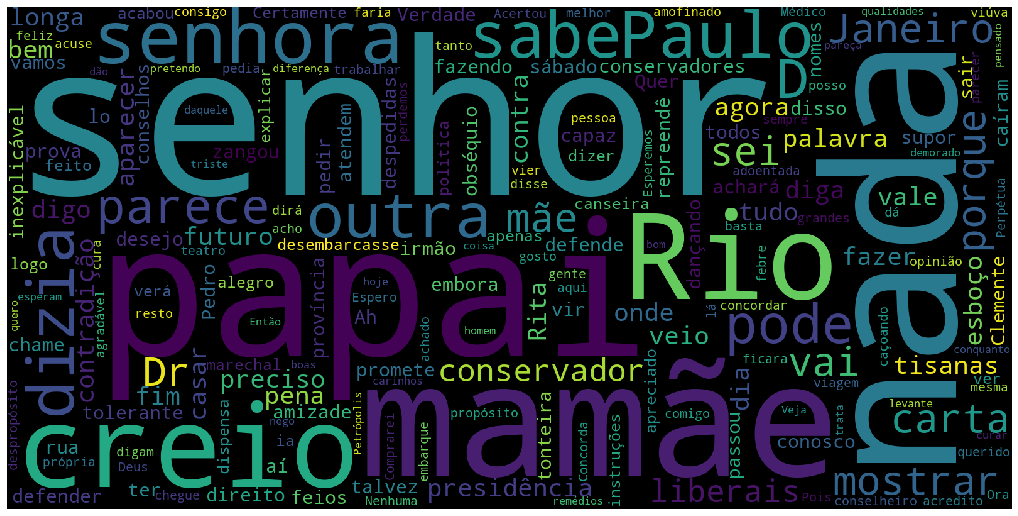

In [10]:
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=1600, height=800).generate(falaFlora)
fig, ax = plt.subplots(figsize=(18,14))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off() 
plt.imshow(wordcloud);

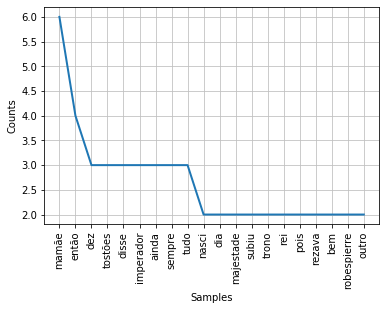

Total de palavras nas falas de Pedro:  232


In [11]:
falaPedro = df[df.Personagem=='Pedro'].Texto.tolist() 
falaPedro = " ".join(s for s in falaPedro )
sentencas = sent_tokenize(falaPedro)
palavras = word_tokenize(falaPedro.lower())
stopwords = set(StopWOrds + list(punctuation))
palavras_pedro = [palavra for palavra in palavras if palavra not in stopwords]
freq = nltk.FreqDist(palavras_pedro)
freq.plot(20, cumulative=False)
print("Total de palavras nas falas de Pedro: ", len(palavras_pedro))

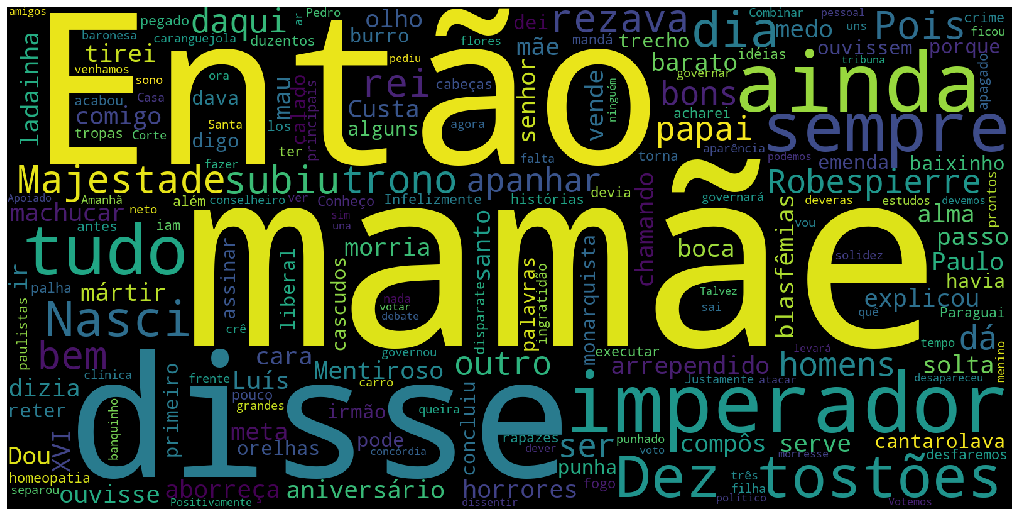

In [12]:
wordcloud = WordCloud(stopwords=stopwords, background_color="black",width=1600, height=800).generate(falaPedro)
fig, ax = plt.subplots(figsize=(18,14))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off() 
plt.imshow(wordcloud);

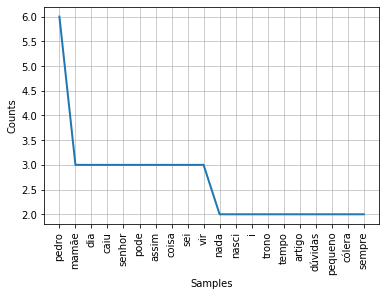

Total de palavras nas falas de Paulo:  226


In [13]:
falaPaulo = df[df.Personagem=='Paulo'].Texto.tolist() 
falaPaulo = " ".join(s for s in falaPaulo )
sentencas = sent_tokenize(falaPaulo)
palavras = word_tokenize(falaPaulo.lower())
stopwords = set(StopWOrds + list(punctuation))
palavras_paulo = [palavra for palavra in palavras if palavra not in stopwords]
freq = nltk.FreqDist(palavras_paulo)
freq.plot(20, cumulative=False)
print("Total de palavras nas falas de Paulo: ", len(palavras_paulo))

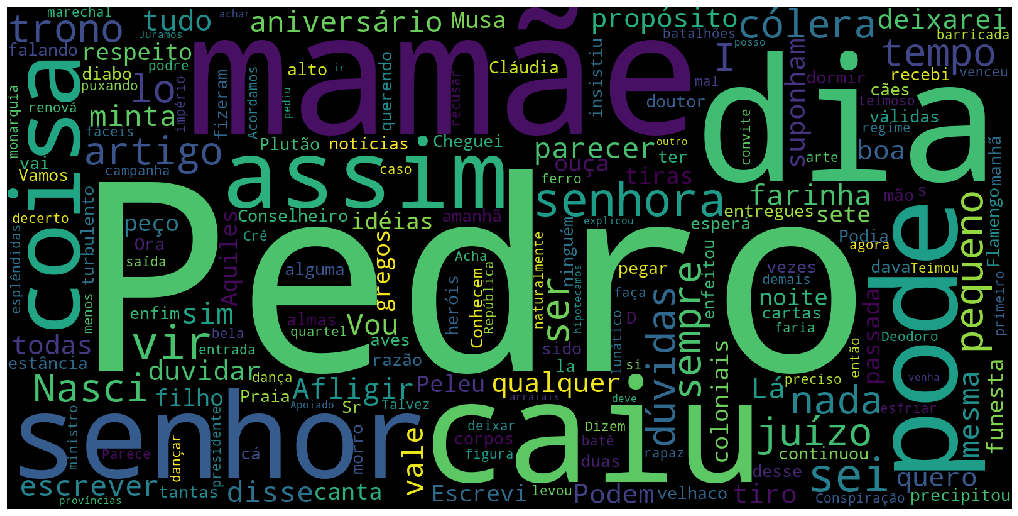

In [14]:
wordcloud = WordCloud(stopwords=stopwords,background_color="black", width=1600, height=800).generate(falaPaulo) 
fig, ax = plt.subplots(figsize=(18,14))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off() 
plt.imshow(wordcloud);

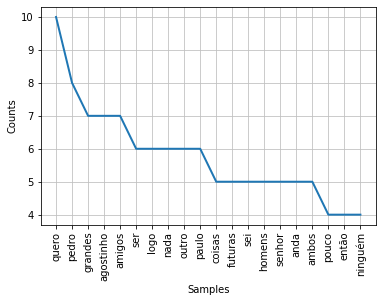

Total de palavras nas falas de Natividade:  720


In [15]:
falaNatividade = df[df.Personagem=='Natividade'].Texto.tolist() 
falaNatividade = " ".join(s for s in falaNatividade )
sentencas = sent_tokenize(falaNatividade)
palavras = word_tokenize(falaNatividade.lower())
stopwords = set(StopWOrds + list(punctuation))
palavras_natividade = [palavra for palavra in palavras if palavra not in stopwords]
freq = nltk.FreqDist(palavras_natividade)
freq.plot(20, cumulative=False)
print("Total de palavras nas falas de Natividade: ", len(palavras_natividade))

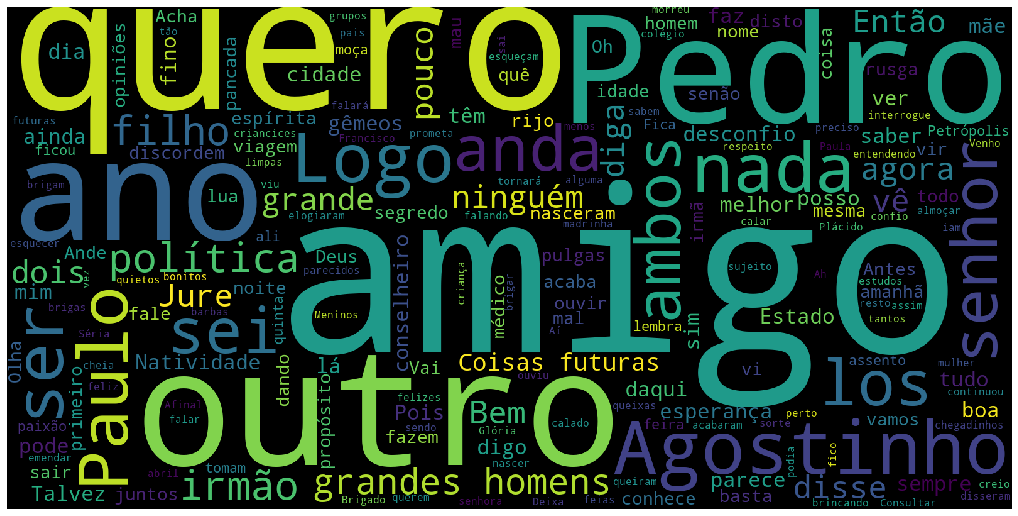

In [16]:
wordcloud = WordCloud(stopwords=stopwords,background_color="black", width=1600, height=800).generate(falaNatividade)
fig, ax = plt.subplots(figsize=(18,14))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off() 
plt.imshow(wordcloud);

## Histograma das Falas

No handles with labels found to put in legend.


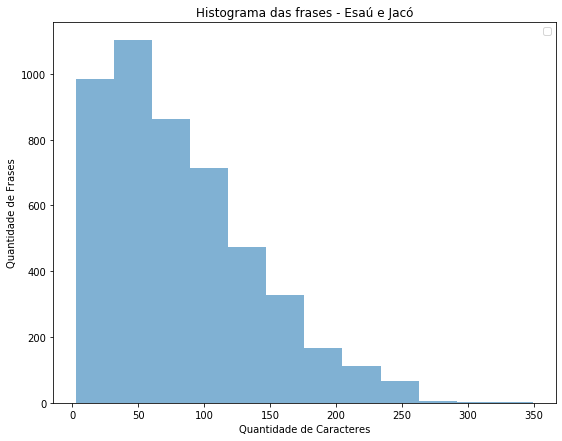

In [17]:
df['TamanhoTexto'] = df['Texto'].apply(len)

x1 =list(df['TamanhoTexto'])
colors = ['#80b1d3']
         
plt.figure(figsize=(9,7))
plt.hist([x1], bins = int(180/15), normed=False, color = colors)

plt.xlabel('Quantidade de Caracteres')
plt.ylabel('Quantidade de Frases')
plt.title ('Histograma das frases - Esaú e Jacó')
plt.legend();

In [18]:
statistics.mean(df['TamanhoTexto'])


82.80514096185738

## Elementos Ortográficos

In [25]:
doc = nlp(falas)
elementos = [(token.orth_, token.pos_) for token in doc]
len(elementos)

88445

In [26]:
df_falas = pd.DataFrame(elementos, columns=['Palavra', 'Tipo'])

In [27]:
df_falas.head(200)

,Palavra,Tipo
0,,SPACE
1,Era,VERB
2,a,DET
3,primeira,ADJ
4,vez,NOUN
...,...,...
195,trazia,VERB
196,certo,DET
197,movimento,NOUN
198,;,PUNCT


In [22]:
df_freq = pd.DataFrame(df_falas['Tipo'].value_counts()).reset_index().sort_values('index').sort_values('Tipo', ascending=False)
df_freq.columns = ['Tipo', 'Quant']
df_freq

,Tipo,Quant
0,PUNCT,13798
1,NOUN,13146
2,VERB,12412
3,DET,9791
4,ADP,8341
5,ADV,6117
6,PROPN,4973
7,PRON,4867
8,SPACE,3786
9,ADJ,3261


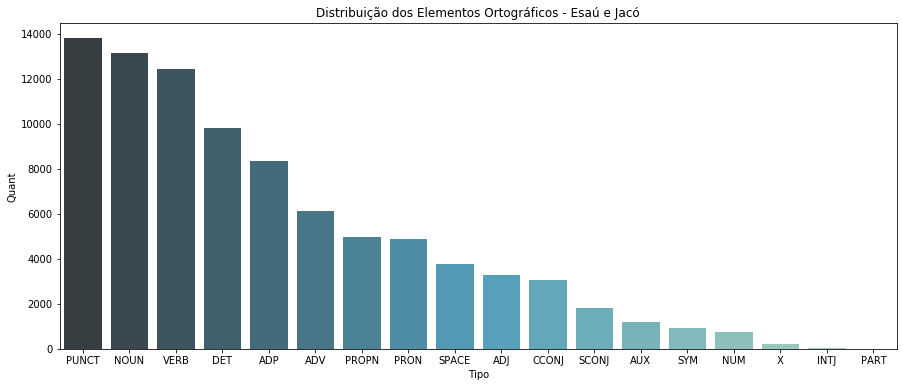

In [23]:
plt.figure(figsize=(15,6))
sns.barplot(data=df_freq, x='Tipo', y='Quant', palette='GnBu_d')
plt.title('Distribuição dos Elementos Ortográficos - Esaú e Jacó')
plt.show()